In [ ]:
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

In [ ]:
!rm New_York_City_.png 

In [ ]:
!rm new-york-city-airbnb-open-data.zip

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


<AxesSubplot:ylabel='Count'>

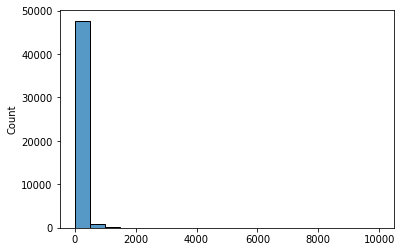

In [5]:
sns.histplot(target, bins=20)

#### data has a long right tale

In [99]:
cols = [
'neighbourhood_group',
'room_type',
'latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365'
       ]

In [100]:
df = df[cols]

In [101]:
df.head()

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,40.64749,-73.97237,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,40.75362,-73.98377,225,1,45,0.38,2,355
2,Manhattan,Private room,40.80902,-73.94190,150,3,0,NaN,1,365
3,Brooklyn,Entire home/apt,40.68514,-73.95976,89,1,270,4.64,1,194
4,Manhattan,Entire home/apt,40.79851,-73.94399,80,10,9,0.10,1,0


In [102]:
df = df.fillna(0)

## Question 1

In [10]:
df.neighbourhood_group.mode()

0    Manhattan
dtype: object

## Question 2

In [103]:
y = df.price.values
df.drop('price', 1, inplace=True)

In [104]:
len(y_train)

29337

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, 
                                                    y, 
                                                    random_state=42, 
                                                    test_size=int(len(df)*0.2)
                                                   )
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  random_state=42, 
                                                  test_size=int(len(df)*0.2)
                                                 )

In [106]:
len(X_train), len(X_val), len(X_test)

(29337, 9779, 9779)

In [107]:
len(y_train), len(y_val), len(y_test)

(29337, 9779, 9779)

In [25]:
X_train.corr()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.080301,0.027441,-0.006246,-0.007159,0.019375,-0.005891
longitude,0.080301,1.000000,-0.060660,0.055084,0.134642,-0.117041,0.083666
minimum_nights,0.027441,-0.060660,1.000000,-0.076020,-0.120703,0.118647,0.138901
number_of_reviews,-0.006246,0.055084,-0.076020,1.000000,0.590374,-0.073167,0.174477
reviews_per_month,-0.007159,0.134642,-0.120703,0.590374,1.000000,-0.048767,0.165376
calculated_host_listings_count,0.019375,-0.117041,0.118647,-0.073167,-0.048767,1.000000,0.225913
availability_365,-0.005891,0.083666,0.138901,0.174477,0.165376,0.225913,1.000000


## Question 3

In [26]:
X_train['above_average'] = np.where(y_train >= 152, 1, 0)

In [27]:
X_train

,neighbourhood_group,room_type,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
13575,Brooklyn,Entire home/apt,40.72760,-73.94495,3,29,0.70,13,50,0
48476,Manhattan,Private room,40.70847,-74.00498,1,0,0.00,1,7,0
44499,Bronx,Entire home/apt,40.83149,-73.92766,40,0,0.00,1,0,0
17382,Brooklyn,Entire home/apt,40.66448,-73.99407,2,3,0.08,1,0,0
14638,Manhattan,Private room,40.74118,-74.00012,1,48,1.80,2,67,0
...,...,...,...,...,...,...,...,...,...,...
13198,Brooklyn,Private room,40.71748,-73.95685,6,5,0.13,1,0,0
14583,Brooklyn,Private room,40.66397,-73.98538,1,7,0.17,2,0,0
6168,Manhattan,Private room,40.79994,-73.97001,1,1,0.64,1,88,1
12248,Brooklyn,Private room,40.69585,-73.96344,60,0,0.00,1,0,0


In [29]:
from sklearn.metrics import mutual_info_score

In [33]:
round(mutual_info_score(X_train.above_average, X_train.neighbourhood_group), 2)

0.05

In [34]:
round(mutual_info_score(X_train.above_average, X_train.room_type), 2)

0.14

## Question 4

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)

In [108]:
X_train = pd.concat([X_train, pd.get_dummies(X_train.neighbourhood_group)], axis=1)
X_train = pd.concat([X_train, pd.get_dummies(X_train.room_type)], axis=1)
X_train.drop(['neighbourhood_group', 'room_type'], 1, inplace=True)

In [55]:
y_train = X_train.above_average.values
X_train.drop('above_average', 1, inplace=True)

In [109]:
X_val = pd.concat([X_val, pd.get_dummies(X_val.neighbourhood_group)], axis=1)
X_val = pd.concat([X_val, pd.get_dummies(X_val.room_type)], axis=1)
X_val.drop(['neighbourhood_group', 'room_type'], 1, inplace=True)

In [57]:
y_val = np.where(y_val >= 152, 1, 0)

In [58]:
model.fit(X_train, y_train)

/Users/dmytro.ivanov/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [59]:
preds= model.predict(X_val)

In [61]:
round(accuracy_score(y_val, preds), 2)

0.79

## Question 5

In [67]:
full_acc = accuracy_score(y_val, preds)

In [64]:
cols_to_drop = [['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], 
                ['Entire home/apt', 'Private room', 'Shared room'],
               'number_of_reviews',
                'reviews_per_month'
               ]

In [68]:
for col in cols_to_drop:
    
    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42, max_iter=1000 )
    model.fit(X_train.drop(col, 1), y_train)
    preds = model.predict(X_val.drop(col, 1))
    print(abs(full_acc - accuracy_score(y_val, preds)))

0.03967685857449643
0.06207178648123535
0.0005112997238980732
0.0


## Question 6

In [79]:
df.head()

,neighbourhood_group,room_type,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,40.64749,-73.97237,1,9,0.21,6,365
1,Manhattan,Entire home/apt,40.75362,-73.98377,1,45,0.38,2,355
2,Manhattan,Private room,40.80902,-73.94190,3,0,NaN,1,365
3,Brooklyn,Entire home/apt,40.68514,-73.95976,1,270,4.64,1,194
4,Manhattan,Entire home/apt,40.79851,-73.94399,10,9,0.10,1,0


In [110]:
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)

In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

In [111]:
alphas = [0, 0.01, 0.1, 1, 10]
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    print(f'aplha: {alpha}, rmse: {round(np.sqrt(mean_squared_error(y_val, preds)), 3)}')

aplha: 0, rmse: 0.503
aplha: 0.01, rmse: 0.497
aplha: 0.1, rmse: 0.497
aplha: 1, rmse: 0.497
aplha: 10, rmse: 0.498


In [112]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Homework 2.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	AB_NYC_2019.csv
	Homework 3.ipynb
	new-york-city-airbnb-open-data.zip

no changes added to commit (use "git add" and/or "git commit -a")
